# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

### Importing the dataset

In [2]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X
X,y = load_breast_cancer(return_X_y=True)
cancer=load_breast_cancer()

In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [4]:
# Use train_test_split() function to split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Store the return value of pervious step to X_train, X_test, y_train, y_test

#### Scale the data since we will be using gradient ascent

In [5]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
# TODO - Print the shape of x_train and y_train 
# print(X_train.shape) # It should print (426, 30)
# print(y_train.shape) # It should print (426,)
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [7]:
# Append a column of ones to x_train 
ones = np.ones((X_train.shape[0],1)) 
X_train = np.hstack((ones,X_train))
# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack

# Now do the same for the test data
ones = np.ones((X_test.shape[0], 1)) 
X_test = np.hstack((ones,X_test))

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train)
print(X_train[0:2])

print(y_train.shape)

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 ... -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 ...  1.43655962  1.14955889
   1.56911143]
 [ 1.         -0.32931176 -0.21507235 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 1.          0.04739597 -0.56293662 ... -1.23262438 -0.68282718
  -1.261137  ]
 [ 1.         -0.04040808  0.09966199 ...  1.08847951  0.48944465
   1.26159953]
 [ 1.         -0.5502381   0.31264011 ... -0.59582424 -0.29911546
  -0.82948141]]
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.3126

### Understanding the dataset

In [8]:
# Printing the names of all the features
# print(cancer.feature_names)

In [9]:
# You can add your own code here to better understand the dataset


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [10]:
# Write the sigmoid function
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [11]:
# Initialize w using np.zeros()

w=np.zeros((X_train.shape[1],1))


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [12]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
    h=sigmoid(np.dot(X, w))
    return h



In [13]:
w=np.zeros((X_train.shape[1],1))

### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [14]:
# Write the log likelihood function 
def log_likelihood(X , y , w ):
    s = np.dot(X, w)
    like = np.sum( y*s - np.log(1 + np.exp(s)) )
    return like




# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [15]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    # Initialize N to the number of training examples
    log_likelihood_values=[]
    w=np.zeros((X.shape[1],1))
#     print(w)
    N=X.shape[0]
    y=y.reshape(X.shape[0],1)
    for i in range(num_iters):
        h=hypothesis(X,w)
        gradient = (1 / N) * np.matmul(X.T, (y - h))
        w = w+(learning_rate * gradient)
        if i % 100 == 0:
            val =log_likelihood(X, y, w)
            log_likelihood_values.append(val)
            print('Iteration Number: ',i,'------','Log Likelihood Value: ',val)
        
        # update the w using formula 
        # append the log_likelihodd values to the list for every 100 iterations
        
    return w ,log_likelihood_values



### After completing the code above, run the following

In [16]:
# Set the learning_rate
# Set the num_iters
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w_final,log_likelihood_values= Logistic_Regresion_Gradient_Ascent(X_train, y_train, 0.01, 5000)
# print(w_final)

# cancer = LogisticRegression(C=1e20)
# cancer.fit(X_train, y_train)
# cancer.coef_

Iteration Number:  0 ------ Log Likelihood Value:  -287.13806310797196
Iteration Number:  100 ------ Log Likelihood Value:  -109.07046636871948
Iteration Number:  200 ------ Log Likelihood Value:  -82.81594468809607
Iteration Number:  300 ------ Log Likelihood Value:  -70.81316442317494
Iteration Number:  400 ------ Log Likelihood Value:  -63.643249284976605
Iteration Number:  500 ------ Log Likelihood Value:  -58.76677404827597
Iteration Number:  600 ------ Log Likelihood Value:  -55.18000266634923
Iteration Number:  700 ------ Log Likelihood Value:  -52.40034899283923
Iteration Number:  800 ------ Log Likelihood Value:  -50.164641435551985
Iteration Number:  900 ------ Log Likelihood Value:  -48.31593009823706
Iteration Number:  1000 ------ Log Likelihood Value:  -46.75412903198439
Iteration Number:  1100 ------ Log Likelihood Value:  -45.412012215271886
Iteration Number:  1200 ------ Log Likelihood Value:  -44.24251991505457
Iteration Number:  1300 ------ Log Likelihood Value:  -43.

##### Plotting Likelihood v/s Number of Iterations.

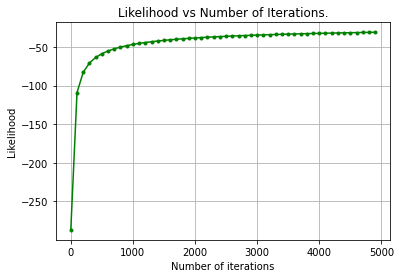

In [17]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,5000,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [18]:
# use hypothesis(...) to predict.


def predict(X_test, w_final):
    threshold=0.5
    predicted_values=[]
    predictions=hypothesis(X_test,w_final)
    for i in predictions:
        if i >=threshold:
            predicted_values.append(1)
        else:
            predicted_values.append(0)
    return predicted_values


predicted_values=predict(X_test,w_final)


In [19]:
TP=0
FP=0
FN=0
TN=0

print(y_test.shape[0])
for i in range(y_test.shape[0]):
    if y_test[i]==0 and predicted_values[i]==0:
        TN=TN+1
    if y_test[i]==0 and predicted_values[i]==1:
        FP=FP+1
    if y_test[i]==1 and predicted_values[i]==1:
        TP=TP+1
    if y_test[i]==1 and predicted_values[i]==0:
        FN=FN+1
    # count TP,FP,FN,FP
        
# calculate precision, recall and f1
precision= TP/(TP+FP)
print("Precision: ",precision)
recall=TP/(TP+FN)
print("Recall: ",recall)
f1=2*(precision*recall)/(precision+recall)
print("F1: ",f1)
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

143
Precision:  0.9887640449438202
Recall:  0.9887640449438202
F1:  0.9887640449438202
Confusion Matrix: 
TP:  88  FN:  1  FP:  1  TN:  53


# Logistic Regression Report

Best Learning rate = 0.1 
That learning rate gave us the least amount of false positives and false negatives.
Increasing the number of iterations didn't change the results in any significant way so I concluded that after a certain value the change is minimal. 

## To run the program:
1. Run the last block of code to display the precision, recall, F1, and the confusion matrix.
2. Run the predict function to predict if a tumor is benign or malignant.

## Detailed description:

1. I import tha dataset and and split it.
2. I initialize w with zeros and run my hypothesis function.
3. I run my gradient ascent function 5000 times to reach my final w values. 
4. I print the log likelihood values every 100 steps.
5. I use the final w values and run my hypothesis function again to find my predictions which I then compare to my threshold.
6. I use the predicted values to build my confusion matrix and find all my accuracy values.